In [3]:
import numpy as np
from skimage import io


class ImageParser:
    def __init__(self):
        pass

    @staticmethod
    def read_png(path):
        image = io.imread(path, as_gray=True)
        return np.add(image < 0.4, image < 0.8, dtype=int)

    @staticmethod
    def write_png(image, path):
        fib = [153, 1, 2]
        myo = [226, 168, 88]

        out_image = np.zeros((image.shape[0], image.shape[1], 3),
                             dtype=np.uint8)
        out_image[image == 1] = myo
        out_image[image == 2] = fib
        io.imsave(path, out_image)

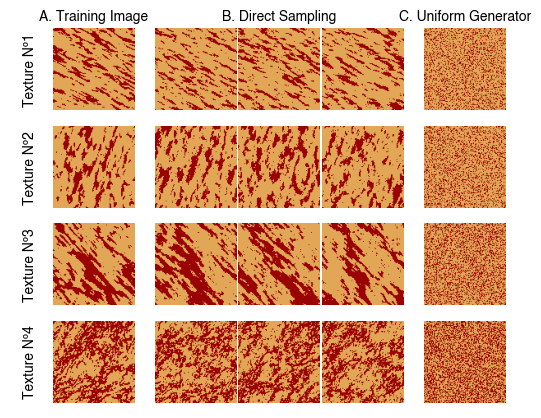

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# plt.rcParams['font.family'] = 'Helvetica'
plt.rc('font', family='Helvetica', size=8)


tex_cmap = mcolors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, '#e2a858'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

path = Path('/Users/arstanbek/Projects/Fibrosis/BiTis/data')
# path = Path('/home/arstan/Projects/Fibrosis/BiTis/data')

pattern_ids = [25, 2, 34, 5]

fig, axs = plt.subplots(nrows=4, ncols=8, figsize=(6.4, 5),
                        width_ratios=[0.5, 1, 0.2, 1, 1, 1, 0.2, 1],
                        gridspec_kw={'hspace': 0.05, 'wspace': 0.03})
for ax in axs.flatten():
    ax.axis('off')

for i, pattern_id in enumerate(pattern_ids):
    tr_filename = f'or_tex_{pattern_id}.png'
    tr_image = ImageParser.read_png(path.joinpath('training', tr_filename))
    tr_image = tr_image[:100, :100]
    tr_image[tr_image == 0] = 1

    axs[i, 1].imshow(tr_image.T, vmin=0, vmax=2, cmap=tex_cmap, origin='lower',
                     aspect='equal')

    img = []
    dens = []
    inds = np.random.choice(np.arange(100), 3, replace=False)

    for idx in inds:
        image = ImageParser.read_png(path.joinpath(f'simulated_{pattern_id}',
                                                   f'gen_tex_{pattern_id}_{idx}.png'))
        img.append(image[:100, :100])
        dens.append(np.mean(image == 2))
    
    uni_img = 1 + (np.random.random(img[-1].shape) <= dens[-1]).astype(int)
    axs[i, -1].imshow(uni_img.T, vmin=0, vmax=2, cmap=tex_cmap, origin='lower')

    for ax_id, im in zip([3, 4, 5], img):
        ax = axs[i, ax_id]
        ax.imshow(im.T, vmin=0, vmax=2, cmap=tex_cmap, origin='lower')

axs[0, 1].set_title('A. Training Image', fontsize=10)
axs[0, 4].set_title('B. Direct Sampling', fontsize=10)
axs[0, -1].set_title('C. Uniform Generator', fontsize=10)

for i, text in enumerate(['Texture Nº1', 'Texture Nº2',
                          'Texture Nº3', 'Texture Nº4']):
    axs[i, 0].text(0.5, 0.5, text, fontsize=10, ha='center', va='center',
                   transform=axs[i, 0].transAxes, rotation=90)

plt.show()

In [30]:
path_save = Path('/Users/arstanbek/Projects/fibrosis/FibrosisAnalysis/paperfigures/pdffig')
fig.savefig(path_save.joinpath('Figure11.pdf'),
            format='pdf',
            dpi=1000,
            bbox_inches='tight')

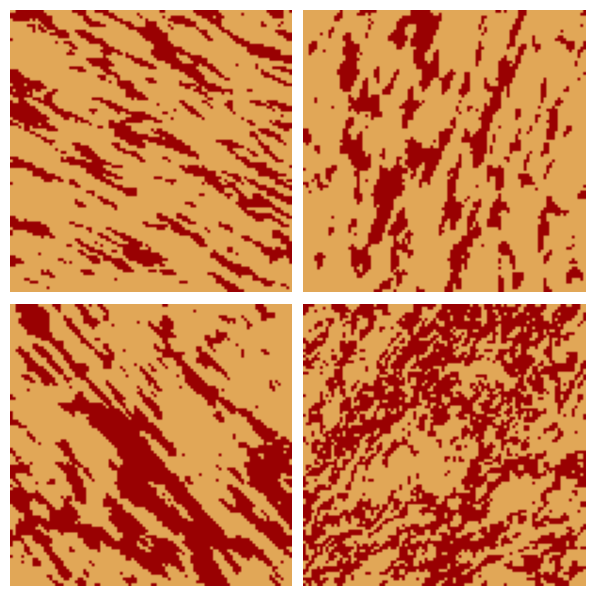

In [4]:
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# plt.rcParams['font.family'] = 'Helvetica'
plt.rc('font', family='Helvetica', size=8)


tex_cmap = mcolors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, '#e2a858'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

path = Path('/Users/arstanbek/Projects/Fibrosis/BiTis/data')
# path = Path('/home/arstan/Projects/Fibrosis/BiTis/data')
path_save = Path("/Users/arstanbek/Projects/fibrosis/FibrosisAnalysis/paperfigures/figures")
pattern_ids = [25, 2, 34, 5]

ids = [[[0, 0], [0, 1], [1, 0], [1, 1]],
       [[0, 2], [0, 3], [1, 2], [1, 3]],
       [[2, 0], [2, 1], [3, 0], [3, 1]],
       [[2, 2], [2, 3], [3, 2], [3, 3]]]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6),
                        sharex=True, sharey=True)
for ax in axs.flatten():
    ax.axis('off')

for i, pattern_id in enumerate(pattern_ids):
    tr_filename = f'or_tex_{pattern_id}.png'
    tr_image = ImageParser.read_png(path.joinpath('training', tr_filename))
    tr_image = tr_image[:100, :100]
    tr_image[tr_image == 0] = 1

    axs.flat[i].imshow(tr_image.T, vmin=0, vmax=2, cmap=tex_cmap,
                       origin='lower', aspect='equal')
    
plt.tight_layout()
plt.show()

In [5]:
path_save = Path("/Users/arstanbek/Projects/fibrosis/FibrosisAnalysis/paperfigures/figures")
fig.savefig(path_save.joinpath('tr_img.png'),
            dpi=300, bbox_inches='tight')

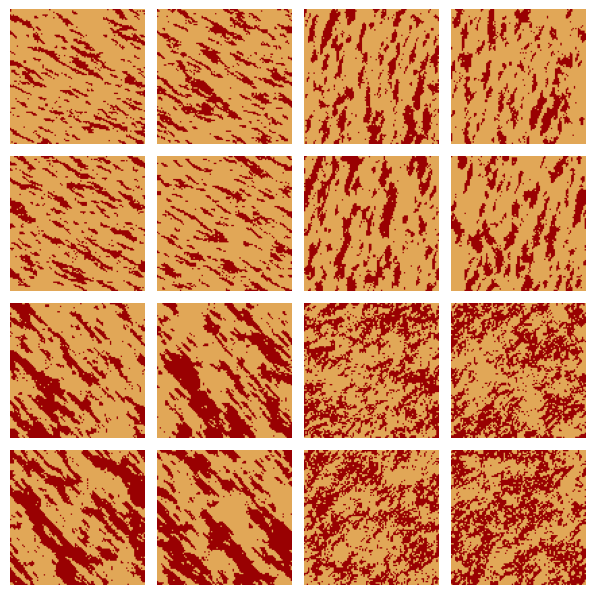

In [6]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# plt.rcParams['font.family'] = 'Helvetica'
plt.rc('font', family='Helvetica', size=8)


tex_cmap = mcolors.LinearSegmentedColormap.from_list(
    'fibrosis', [(0, '#e2a858'),
                 (0.5, '#e2a858'),
                 (1, '#990102')])

path = Path('/Users/arstanbek/Projects/Fibrosis/BiTis/data')
# path = Path('/home/arstan/Projects/Fibrosis/BiTis/data')

pattern_ids = [25, 2, 34, 5]

ids = [[[0, 0], [0, 1], [1, 0], [1, 1]],
       [[0, 2], [0, 3], [1, 2], [1, 3]],
       [[2, 0], [2, 1], [3, 0], [3, 1]],
       [[2, 2], [2, 3], [3, 2], [3, 3]]]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(6, 6),
                        sharex=True, sharey=True)
for ax in axs.flatten():
    ax.axis('off')

for i, pattern_id in enumerate(pattern_ids):
    img = []
    inds = np.random.choice(np.arange(100), 4, replace=False)

    for j, idx in enumerate(inds):
        image = ImageParser.read_png(path.joinpath(f'simulated_{pattern_id}',
                                                   f'gen_tex_{pattern_id}_{idx}.png'))
        img = image[:100, :100]
        x, y = ids[i][j]
        axs[x, y].imshow(img.T, vmin=0, vmax=2, cmap=tex_cmap, origin='lower')
    
plt.tight_layout()
plt.show()

In [7]:
path_save = Path("/Users/arstanbek/Projects/fibrosis/FibrosisAnalysis/paperfigures/figures")
fig.savefig(path_save.joinpath('ds_img.png'),
            dpi=300, bbox_inches='tight')

## Generation Quality

In [7]:
import pandas as pd
from bitis.texture.texture import Texture
from bitis.texture.properties import (
    PatternPropertiesBuilder,
    DistributionEllipseBuilder,
    PolarPlots,
    PointDensity
)


def calc_props(image, area_min=10, area_quantile=0.95):
    pattern_builder = PatternPropertiesBuilder(area_quantile=area_quantile,
                                               area_min=area_min)
    pattern_props = pattern_builder.build(image == 2)
    return pattern_props, pattern_builder.object_props


def read_image(path):
    image = ImageParser.read_png(path)
    image[image == 0] = 1
    return image[:100, :100]


def make_pattern_stats(path, pattern_ids, n_samples=100):
    
    all_pattern_props = []
    all_object_props = []
    for pattern_id in pattern_ids:
        for i in range(n_samples):
            image = read_image(path.joinpath(f'simulated_{pattern_id}',
                                             f'gen_tex_{pattern_id}_{i}.png'))
            
            pattern_props, object_props = calc_props(image)
            pattern_props['pattern_id'] = pattern_id

            object_props['pattern_id'] = pattern_id
            object_props['sample_id'] = i

            all_pattern_props.append(pattern_props)
            all_object_props.append(object_props)
    
    all_pattern_props = pd.concat(all_pattern_props).reset_index(drop=True)
    all_object_props = pd.concat(all_object_props).reset_index(drop=True)
    return all_pattern_props, all_object_props



data, objects_data = make_pattern_stats(path, [25, 2, 34, 5])

In [8]:
data.loc[data['orientation'] < 0, 'orientation'] = np.pi + \
    data[data['orientation'] < 0]['orientation']
data.loc[data['orientation'] > np.pi/2, 'orientation'] = - \
    np.pi + data[data['orientation'] > np.pi/2]['orientation']

data['deg_orientation'] = np.degrees(data['orientation'])

data.groupby('pattern_id').describe().T

pattern_id                           2           5           25          34
density               count  100.000000  100.000000  100.000000  100.000000
                      mean     0.258667    0.418056    0.206165    0.383636
                      std      0.021066    0.029331    0.018304    0.050740
                      min      0.199800    0.334400    0.157400    0.269800
                      25%      0.243350    0.399475    0.194875    0.347850
                      50%      0.259300    0.420350    0.203850    0.381900
                      75%      0.276025    0.437675    0.217125    0.423600
                      max      0.300300    0.507800    0.259200    0.489200
elongation            count  100.000000  100.000000  100.000000  100.000000
                      mean     2.641107    2.006752    3.949987    3.067594
                      std      0.296243    0.188804    0.352819    0.414315
                      min      2.145134    1.573246    3.185687    2.153236
                      25%      2.448839    1.867941    3.682025    2.796243
                      50%      2.607216    2.004942    3.958161    3.075552
                      75%      2.836802    2.112864    4.160073    3.316002
                      max      3.508849    2.525920    4.724516    4.345089
orientation           count  100.000000  100.000000  100.000000  100.000000
                      mean     1.378751    0.746958   -0.471796   -0.836850
                      std      0.055745    0.183802    0.042399    0.065387
                      min      1.246001    0.329705   -0.577988   -1.116956
                      25%      1.344825    0.661372   -0.506296   -0.874659
                      50%      1.377810    0.757197   -0.471262   -0.834167
                      75%      1.412126    0.853721   -0.441227   -0.807454
                      max      1.503077    1.326410   -0.373897   -0.686923
compactness           count  100.000000  100.000000  100.000000  100.000000
                      mean     0.134499    0.345428    0.098531    0.323630
                      std      0.021268    0.039473    0.016058    0.057726
                      min      0.083500    0.238400    0.063800    0.200400
                      25%      0.120550    0.324425    0.085725    0.275475
                      50%      0.132250    0.343000    0.095100    0.328400
                      75%      0.148925    0.370875    0.111175    0.363775
                      max      0.190700    0.473100    0.135900    0.442400
structural_anisotropy count  100.000000  100.000000  100.000000  100.000000
                      mean     5.573311    2.405868    9.264826    8.343887
                      std      1.381932    0.866511    2.119058    3.501039
                      min      3.279629    1.261292    5.832310    3.427297
                      25%      4.704137    1.924815    7.643855    6.161540
                      50%      5.297228    2.169202    9.114660    7.745605
                      75%      6.313135    2.581119   10.568649    9.462125
                      max     11.356534    6.536841   15.124142   18.926340
complexity            count  100.000000  100.000000  100.000000  100.000000
                      mean    73.498513  135.579315   72.333976   60.755969
                      std      5.309101    9.233061    7.032958    6.415314
                      min     60.048487  111.634113   52.368011   44.842738
                      25%     70.010325  128.394758   68.085232   56.321204
                      50%     73.520378  136.427249   72.396737   60.780771
                      75%     76.533399  141.983412   76.877566   64.494523
                      max     89.441709  154.504640   86.234970   75.774982
deg_orientation       count  100.000000  100.000000  100.000000  100.000000
                      mean    78.996598   42.797551  -27.031904  -47.947948
                      std      3.193944   10.531065    2.429283    3.746395
                      min     71.390600   18.890

In [9]:
# path = Path('/Users/arstanbek/Projects/BiTis/data/training')

tr_props = []
tr_objects = []

for pattern_id in pattern_ids:
    tr_image = read_image(path.joinpath('training', 
                                        f'or_tex_{pattern_id}.png'))
    pprops, oprops = calc_props(tr_image)
    pprops['pattern_id'] = pattern_id

    oprops['pattern_id'] = pattern_id
    oprops['sample_id'] = 0

    tr_props.append(pprops)
    tr_objects.append(oprops)

tr_data = pd.concat(tr_props).reset_index(drop=True)
tr_objects = pd.concat(tr_objects).reset_index(drop=True)
tr_data.loc[tr_data['orientation'] > 0.5 * np.pi, 'orientation'] -= np.pi

In [10]:
tr_data['deg_orientation'] = np.degrees(tr_data['orientation'])
tr_data.groupby('pattern_id').describe().T

pattern_id                          2           5          25         34
density               count   1.000000    1.000000   1.000000   1.000000
                      mean    0.235700    0.452000   0.251000   0.360300
                      std          NaN         NaN        NaN        NaN
                      min     0.235700    0.452000   0.251000   0.360300
                      25%     0.235700    0.452000   0.251000   0.360300
                      50%     0.235700    0.452000   0.251000   0.360300
                      75%     0.235700    0.452000   0.251000   0.360300
                      max     0.235700    0.452000   0.251000   0.360300
elongation            count   1.000000    1.000000   1.000000   1.000000
                      mean    2.629175    1.793300   4.342572   3.909836
                      std          NaN         NaN        NaN        NaN
                      min     2.629175    1.793300   4.342572   3.909836
                      25%     2.629175    1.793300   4.342572   3.909836
                      50%     2.629175    1.793300   4.342572   3.909836
                      75%     2.629175    1.793300   4.342572   3.909836
                      max     2.629175    1.793300   4.342572   3.909836
orientation           count   1.000000    1.000000   1.000000   1.000000
                      mean    1.331358    0.872939  -0.486476  -0.854912
                      std          NaN         NaN        NaN        NaN
                      min     1.331358    0.872939  -0.486476  -0.854912
                      25%     1.331358    0.872939  -0.486476  -0.854912
                      50%     1.331358    0.872939  -0.486476  -0.854912
                      75%     1.331358    0.872939  -0.486476  -0.854912
                      max     1.331358    0.872939  -0.486476  -0.854912
compactness           count   1.000000    1.000000   1.000000   1.000000
                      mean    0.113800    0.391400   0.126600   0.305100
                      std          NaN         NaN        NaN        NaN
                      min     0.113800    0.391400   0.126600   0.305100
                      25%     0.113800    0.391400   0.126600   0.305100
                      50%     0.113800    0.391400   0.126600   0.305100
                      75%     0.113800    0.391400   0.126600   0.305100
                      max     0.113800    0.391400   0.126600   0.305100
structural_anisotropy count   1.000000    1.000000   1.000000   1.000000
                      mean    4.413714    3.443814  11.004543  10.879331
                      std          NaN         NaN        NaN        NaN
                      min     4.413714    3.443814  11.004543  10.879331
                      25%     4.413714    3.443814  11.004543  10.879331
                      50%     4.413714    3.443814  11.004543  10.879331
                      75%     4.413714    3.443814  11.004543  10.879331
                      max     4.413714    3.443814  11.004543  10.879331
complexity            count   1.000000    1.000000   1.000000   1.000000
                      mean   66.161508  147.415642  86.257675  61.680524
                      std          NaN         NaN        NaN        NaN
                      min    66.161508  147.415642  86.257675  61.680524
                      25%    66.161508  147.415642  86.257675  61.680524
                      50%    66.161508  147.415642  86.257675  61.680524
                      75%    66.161508  147.415642  86.257675  61.680524
                      max    66.161508  147.415642  86.257675  61.680524
deg_orientation       count   1.000000    1.000000   1.000000   1.000000
                      mean   76.281196   50.015721 -27.873024 -48.982871
                      std          NaN         NaN        NaN        NaN
                      min    76.281196   50.015721 -27.873024 -48.982871
                      25%    76.281196   50.015721 -27.873024 -48.982871
                      50%    76.281196   50.015721 -27.873

In [11]:
uni_props = []
uni_objects = []

for pattern_id in pattern_ids:
    uni_image = read_image(path.joinpath('training', 
                                        f'or_tex_{pattern_id}.png'))
    dens = np.mean(uni_image == 2)
    uni_image = 1 + (np.random.random(uni_image.shape) <= dens).astype(int)
    pprops, oprops = calc_props(uni_image)
    pprops['pattern_id'] = pattern_id

    oprops['pattern_id'] = pattern_id
    oprops['sample_id'] = 0

    uni_props.append(pprops)
    uni_objects.append(oprops)

uni_data = pd.concat(uni_props).reset_index(drop=True)
uni_objects = pd.concat(uni_objects).reset_index(drop=True)
uni_data.loc[uni_data['orientation'] > 0.5 * np.pi, 'orientation'] -= np.pi

In [12]:
uni_data['deg_orientation'] = 0
uni_data['orientation'] = 0
uni_data.groupby('pattern_id').describe().T

pattern_id                         2           5         25         34
density               count  1.000000    1.000000  1.000000   1.000000
                      mean   0.240100    0.453100  0.253000   0.357100
                      std         NaN         NaN       NaN        NaN
                      min    0.240100    0.453100  0.253000   0.357100
                      25%    0.240100    0.453100  0.253000   0.357100
                      50%    0.240100    0.453100  0.253000   0.357100
                      75%    0.240100    0.453100  0.253000   0.357100
                      max    0.240100    0.453100  0.253000   0.357100
elongation            count  1.000000    1.000000  1.000000   1.000000
                      mean   1.940799    1.931526  1.841113   1.853407
                      std         NaN         NaN       NaN        NaN
                      min    1.940799    1.931526  1.841113   1.853407
                      25%    1.940799    1.931526  1.841113   1.853407
                      50%    1.940799    1.931526  1.841113   1.853407
                      75%    1.940799    1.931526  1.841113   1.853407
                      max    1.940799    1.931526  1.841113   1.853407
orientation           count  1.000000    1.000000  1.000000   1.000000
                      mean   0.000000    0.000000  0.000000   0.000000
                      std         NaN         NaN       NaN        NaN
                      min    0.000000    0.000000  0.000000   0.000000
                      25%    0.000000    0.000000  0.000000   0.000000
                      50%    0.000000    0.000000  0.000000   0.000000
                      75%    0.000000    0.000000  0.000000   0.000000
                      max    0.000000    0.000000  0.000000   0.000000
compactness           count  1.000000    1.000000  1.000000   1.000000
                      mean   0.045900    0.154500  0.049800   0.089000
                      std         NaN         NaN       NaN        NaN
                      min    0.045900    0.154500  0.049800   0.089000
                      25%    0.045900    0.154500  0.049800   0.089000
                      50%    0.045900    0.154500  0.049800   0.089000
                      75%    0.045900    0.154500  0.049800   0.089000
                      max    0.045900    0.154500  0.049800   0.089000
structural_anisotropy count  1.000000    1.000000  1.000000   1.000000
                      mean   5.117862    1.235728  1.732671   1.369507
                      std         NaN         NaN       NaN        NaN
                      min    5.117862    1.235728  1.732671   1.369507
                      25%    5.117862    1.235728  1.732671   1.369507
                      50%    5.117862    1.235728  1.732671   1.369507
                      75%    5.117862    1.235728  1.732671   1.369507
                      max    5.117862    1.235728  1.732671   1.369507
complexity            count  1.000000    1.000000  1.000000   1.000000
                      mean   8.541672  145.140305  5.940194  57.668310
                      std         NaN         NaN       NaN        NaN
                      min    8.541672  145.140305  5.940194  57.668310
                      25%    8.541672  145.140305  5.940194  57.668310
                      50%    8.541672  145.140305  5.940194  57.668310
                      75%    8.541672  145.140305  5.940194  57.668310
                      max    8.541672  145.140305  5.940194  57.668310
deg_orientation       count  1.000000    1.000000  1.000000   1.000000
                      mean   0.000000    0.000000  0.000000   0.000000
                      std         NaN         NaN       NaN        NaN
                      min    0.000000    0.000000  0.000000   0.000000
                      25%    0.000000    0.000000  0.000000   0.000000
                      50%    0.000000    0.000000  0.000000   0.000000
                      75%    0.000000    0.000000  0.000000   0.000000
                      ma

In [22]:
def calc_ccdf(df):
    count = np.bincount(df['area'].values.astype(int))
    area_bins = np.arange(1 + df['area'].max())

    area_bins = area_bins[1:]
    count = count[1:]
    ccdf = np.cumsum(count[::-1])[::-1] / np.sum(count)
    return area_bins, ccdf


def calc_area_cdf(df):
    count = np.bincount(df['area'].values.astype(int))
    area_bins = np.arange(1 + df['area'].max())

    area_bins = area_bins[1:]
    count = count[1:]
    area = area_bins * count

    cdf = np.cumsum(area) / np.sum(area)
    return area_bins, cdf


def draw_area_cdf(ax, objects_props, label='', color='blue', alpha=1.0):
    area_bins, cdf = calc_area_cdf(objects_props)
    ax.plot(area_bins, cdf, label=label, color=color, alpha=alpha)
    ax.set_xlabel('Cluster Size', fontsize=10)
    ax.set_ylabel('Fibrotic Tissue', fontsize=10)
    ax.set_xscale('log')


def draw_ccdf(ax, objects_props, label='', color='blue', alpha=1.0, title=''):
    area_bins, ccdf = calc_ccdf(objects_props)
    ax.plot(area_bins, ccdf, label=label, color=color, alpha=alpha)
    ax.set_xlabel('Cluster Size', fontsize=10)
    # ax.set_ylabel('CCDF')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.grid(True, which='both', alpha=0.5)
    ax.set_title(title, fontsize=10, loc='left')
    # ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
    # ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)

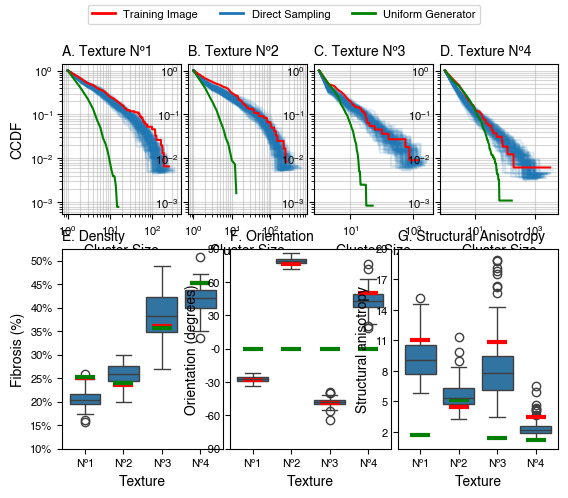

In [27]:
import seaborn as sns
import matplotlib as mpl


data.loc[data['orientation'] < 0, 'orientation'] = np.pi + \
    data[data['orientation'] < 0]['orientation']
data.loc[data['orientation'] > np.pi/2, 'orientation'] = - \
    np.pi + data[data['orientation'] > np.pi/2]['orientation']

# colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']
colors = ['tab:blue', 'tab:blue', 'tab:blue', 'tab:blue']
axs_ids = ['a', 'b', 'c', 'd', 'e', 'f', 'g']
titles = ['A. Texture Nº1', 'B. Texture Nº2', 'C. Texture Nº3', 'D. Texture Nº4',
          'E. Density', 'F. Orientation', 'G. Structural Anisotropy']

fig, axs = plt.subplot_mosaic([['a', 'a', 'a',
                                'b', 'b', 'b',
                                'c', 'c', 'c',
                                'd', 'd', 'd'],
                               ['e', 'e', 'e', 'e',
                                'f', 'f', 'f', 'f',
                                'g', 'g', 'g', 'g'],
                               ], 
                                figsize=(6.4, 5),
                                height_ratios=[3, 4])

for l in ['a', 'b', 'c', 'd']:
    axs[l].sharey(axs['a'])

for i, prop in enumerate(['density', 'orientation', 'structural_anisotropy']):
    sns.boxplot(x='pattern_id', y=prop, data=data, order=pattern_ids, ax=axs[axs_ids[i+4]],
                palette=colors, linewidth=1, hue='pattern_id', legend=False)
    axs[axs_ids[i+4]].plot(tr_data[prop], marker='_', markersize=15, markeredgewidth=3,
                ls='', color='r', label='Training Image')
    axs[axs_ids[i+4]].plot(uni_data[prop], marker='_', markersize=15, markeredgewidth=3,
                ls='', color='g', label='Uniform Generator')
    axs[axs_ids[i+4]].set_xticks(np.arange(len(pattern_ids)))
    axs[axs_ids[i+4]].set_xticklabels([f'Nº{i}' for i in range(1, 1 + len(pattern_ids))],
                           fontsize=8)
    axs[axs_ids[i+4]].set_xlabel('Texture', fontsize=10)
    axs[axs_ids[i+4]].set_title(titles[i + 4], fontsize=10, loc='left')

legend_lines = [mpl.lines.Line2D([0], [0], color='red', lw=2, label='Training Image'),
                mpl.lines.Line2D([0], [0], color='tab:blue', lw=2, label='Direct Sampling'),
                mpl.lines.Line2D([0], [0], color='g', lw=2, label='Uniform Generator')]

# for subplot in ['a', 'b', 'c', 'd']:
#     axs[subplot].legend(handles=legend_lines, loc='lower left', fontsize=11)

# axs['e'].legend(handles=legend_lines, loc='upper left', fontsize=11)
# axs['f'].legend(handles=legend_lines, loc='lower left', fontsize=11)
# axs['g'].legend(handles=legend_lines, loc='upper left', fontsize=11)

axs['e'].set_yticks(np.arange(0.1, 0.55, 0.05))
# axs['e'].set_yticklabels(axs['e'].get_yticks(), fontsize=8)
axs['e'].set_ylabel('Fibrosis (%)', fontsize=10)
axs['e'].yaxis.set_major_formatter(
    mpl.ticker.PercentFormatter(xmax=1, decimals=0))

axs['f'].set_ylim(-np.pi/2, np.pi/2)
axs['f'].set_yticks(np.arange(-np.pi/2, 1.1 * np.pi/2, np.pi/6))
# axs['f'].set_yticklabels(axs['f'].get_yticks(), fontsize=8)
axs['f'].set_ylabel('Orientation (degrees)', fontsize=10)
axs['f'].yaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, _: f'{np.rad2deg(x):.0f}'))

axs['g'].set_yticks(np.arange(2, 21, 3))
# axs['g'].set_yticklabels(axs['g'].get_yticks(), fontsize=8)
axs['g'].set_ylabel('Structural anisotropy', fontsize=10)
axs['g'].yaxis.set_major_formatter(
    mpl.ticker.FuncFormatter(lambda x, _: f'{x:.0f}'))

for i, pattern_id in enumerate(pattern_ids):
    for j in range(100):
        draw_ccdf(axs[axs_ids[i]], objects_data[(objects_data['pattern_id'] == pattern_id) &
                                            (objects_data['sample_id'] == j)],
                                            color=colors[i], alpha=0.15)
    draw_ccdf(axs[axs_ids[i]], tr_objects[tr_objects['pattern_id'] == pattern_id],
              label='Training Image', color='red', alpha=1.0, title=titles[i])
    draw_ccdf(axs[axs_ids[i]], uni_objects[uni_objects['pattern_id'] == pattern_id],
              label='Uniform Generator', color='g', alpha=1.0, title=titles[i])
    # axs[axs_ids[i]].legend(loc='lower right', fontsize=11)
axs['a'].set_ylabel('CCDF', fontsize=10)

# plt.tight_layout()

fig.legend(handles=legend_lines,
           loc='upper center', ncol=3, prop={'size': 8})

# plt.subplots_adjust(top=0.89, 
#                     bottom=0.05, 
#                     left=0.05, 
#                     right=0.95, 
#                     hspace=1,
#                     wspace=5.5)
plt.show()

In [42]:
path_save = Path('/Users/arstanbek/Projects/FibrosisAnalysis/paperfigures/figures')
fig.savefig(path_save.joinpath('ds_generation_quality.png'),
            dpi=300, bbox_inches='tight')